# Summary of the Ripple transaction history from 01/06/2017 - 29/08/2017
1. [Cumulative number of transactions over time](#Transactions-over-time)

2. Distribution of the number of transactions per user

3. Fraction of senders that have at least 1, 2, 3, ..., 200 transactions

4. Fraction of senders that are also receivers and vice versa (This is just a bar chart with 2 bars)

5. Popularity of destinations

6. Popularity of currencies

7. Distribution of transaction amount per currency

In [3]:
#LOAD LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline

In [12]:
#LOAD DATA
start_date = datetime.date(2017,6,1)
end_date = datetime.date(2017,8,29)
date_list = pd.date_range(start_date,end_date,freq="1D")

files = []
for day in date_list:
    #print("Current date: {}".format(day.strftime("%Y-%m-%d")))
    this_day = day.strftime("%Y-%m-%d")
    next_day = (day+datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    files.append(pd.read_csv("Ripple_transactions_{}_to_{}.csv".format(this_day,next_day)))
dataset['Amount'] = dataset['Amount'].astype('float')
dataset = pd.concat(files)

In [13]:
dataset.head()

,Amount,Currency,Destination,Sender,Timestamp,Unnamed: 0
0,2949.09,USD,r9Gps6fB9YLuZ87rWx7M9TgLAGK2zsz5s6,r9Gps6fB9YLuZ87rWx7M9TgLAGK2zsz5s6,2017-06-01T00:00:00+00:00,NaN
1,2e+06,XRP,rUe9M6mWf7RsvB9WpKic6cGWe6vsPexp7M,rUe9M6mWf7RsvB9WpKic6cGWe6vsPexp7M,2017-06-01T00:00:02+00:00,NaN
2,1.99e+10,XRP,rPujGTiw6nKmMvAiUT6UjpFxT9QrDn9kJP,rfJdAU6BobgadzkJkme6dKq1tzzkvqoEiU,2017-06-01T00:00:30+00:00,NaN
3,100000,RIP,rHaans8PtgwbacHvXAL3u6TG28gTAtCwr8,r9KG7Du7aFmABzMvDnwuvPaEoMu4Eurwok,2017-06-01T00:00:31+00:00,NaN
4,2.1e+10,XRP,rpNqAwVKdyWxZoHerUzDfgEEobNQPnQgPU,rJFQgFvtJq2uEDsKHgTaQrp84ZV9jGqkHy,2017-06-01T00:00:40+00:00,NaN


In [6]:
dataset.loc[:,'Sender'].head()

0    r9Gps6fB9YLuZ87rWx7M9TgLAGK2zsz5s6
1    rUe9M6mWf7RsvB9WpKic6cGWe6vsPexp7M
2    rfJdAU6BobgadzkJkme6dKq1tzzkvqoEiU
3    r9KG7Du7aFmABzMvDnwuvPaEoMu4Eurwok
4    rJFQgFvtJq2uEDsKHgTaQrp84ZV9jGqkHy
Name: Sender, dtype: object

In [14]:
#BASIC SUMMARY
# 2.5 million transactions
# 152 different currencies
# 132,131 receivers
# 89,148 senders
dataset.describe(include='all')

,Amount,Currency,Destination,Sender,Timestamp,Unnamed: 0
count,2487188.0,2487188,2487188,2487188,2487188,112689.000000
unique,481654.0,152,132131,89148,1316355,NaN
top,1.0,XRP,rwXZe6N3YMtKuGkZDjoqeS6KE3am3U7br,rDCgaaSBAWYfsxUYhCk1n26Na7x8PQGmkq,2017-06-21T05:12:31+00:00,NaN
freq,379511.0,2233987,344662,90300,78,NaN
mean,NaN,NaN,NaN,NaN,NaN,18925.826212
std,NaN,NaN,NaN,NaN,NaN,11096.643751
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9390.000000
50%,NaN,NaN,NaN,NaN,NaN,18781.000000
75%,NaN,NaN,NaN,NaN,NaN,28172.000000


# Transactions over time

In [ ]:
#GROUP DATA BY DATE
dataset.loc[:,'Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Date'] = dataset['Timestamp'].apply(lambda x: x.date())

grouped_date = dataset.groupby('Date')['Amount'] #`grouped_d` = GROUPED by Date

In [ ]:
grouped_date_agg = grouped_date.size().values #Aggregated

grouped_date_agg_sum = np.cumsum(grouped_date_agg)

plt.figure(figsize=(10,5))
plt.plot(date_list,grouped_date_agg)
plt.xlabel('Date')
plt.ylabel('Number of transactions')
plt.title('Number of transactions by date 01/06/2017 - 29/08/2017')

plt.figure(figsize=(10,5))
plt.plot(date_list,grouped_date_agg_sum)
plt.xlabel('Date')
plt.ylabel('Number of transactions')
plt.title('Cumulative number of transactions 01/06/2017 - 29/08/2017')

# Distribution of number of transactions by user

In [ ]:
grouped_s = dataset.groupby('Sender')
grouped_d = dataset.groupby('Destination')

In [ ]:
grouped_s_agg = grouped_s.size()
grouped_d_agg = grouped_d.size()

In [ ]:
print("Number of senders: {} \nNumber of receivers: {}".format(len(grouped_s_agg),len(grouped_d_agg)))

In [ ]:
#DESCRIBE SENDER DISTRIBUTION
#max = 12,378
#mean = 1
grouped_s_agg.describe()

In [ ]:
#DESCRIBE RECEIVER DISTRIBUTION
#max = 344,662
#mean = 2
grouped_d_agg.describe()

In [ ]:
#Plotting histograms
freq, bin_edges = np.histogram(grouped_s_agg.values,bins=range(len(grouped_s_agg)))
proportion = freq/len(grouped_s_agg)
at_least = 1-np.cumsum(proportion)

plt.figure()
plt.xlabel('Number of transactions')
plt.ylabel('Number of senders')
plt.title('Distribution of transactions by sender')
plt.grid()
plt.bar(bin_edges[0:30],freq[0:30],width=1,log=True)

plt.figure()
plt.xlabel('n = Number of transactions')
plt.ylabel('Proportion of senders')
plt.title('Distribution of senders with at least `n` transactions')
plt.grid()
plt.bar(bin_edges[0:200],at_least[0:200],width=1,log=True)

In [ ]:
freq, bin_edges = np.histogram(grouped_d_agg.values,bins=range(len(grouped_d_agg)))
proportion = freq/len(grouped_d_agg)
at_least = 1-np.cumsum(proportion)

plt.figure()
plt.xlabel('Number of transactions')
plt.ylabel('Number of receivers')
plt.title('Distribution of transactions by destination')
plt.grid()
plt.bar(bin_edges[0:30],freq[0:30],width=1,log=True)

plt.figure()
plt.xlabel('n = Number of transactions')
plt.ylabel('Proportion of receivers')
plt.title('Distribution of receivers with at least `n` transactions')
plt.grid()
plt.bar(bin_edges[0:200],at_least[0:200],width=1,log=True)

# Fraction of senders that are also receivers

In [ ]:
senders = set(grouped_s_agg.keys())
receivers = set(grouped_d_agg.keys())

In [ ]:
rec_intersect_sen = len(senders.intersection(receivers))/len(senders)

In [ ]:
sen_intersect_rec = len(receivers.intersection(senders))/len(receivers)

In [ ]:
plt.figure()
plt.title('Senders and Receivers - are they different?')
plt.ylabel('Proportion of ...')
plt.bar([0,1],[rec_intersect_sen,sen_intersect_rec],tick_label=[r'Senders who are also receivers','Receivers who are also senders'])

# Popularity of senders

In [ ]:
most_pop_sen = grouped_s_agg.nlargest(50)[::-1]

trans_sen = dict()
trans_rec = dict()
tot_trans_by_accnt = dict()
for accnt in most_pop_sen.keys():
    trans_sen[accnt] = int(grouped_s_agg[accnt])
    if accnt in receivers:
        trans_rec[accnt] = int(grouped_d_agg[accnt])
    else:
        trans_rec[accnt] = 0
    tot_trans_by_accnt[accnt] =  trans_rec[accnt] + trans_sen[accnt]
    

plt.figure(figsize=(10,15))
plt.title('Top 50 most active senders')
plt.xlabel('Proportion of transactions in the whole Ripple system')
plt.ylabel('Rank as sender')
#Uncomment to plot with the account id
#plt.barh(np.arange(0,50,1),most_pop_sen.values/len(dataset),height=.8,tick_label=most_pop_sen.keys())
plt.barh(np.arange(0,len(rec_ordered_by_sen),1)*2,most_pop_sen.values/len(dataset),height=.8,tick_label=most_pop_sen.keys(),
        label='Proportion of transactions in which account was the sender')
rec_ordered_by_sen = dict()
for account in most_pop_sen.keys():
    if account in receivers:
        rec_ordered_by_sen[account] = grouped_d_agg[account]
    else:
        rec_ordered_by_sen[account] = 0
vals = np.asarray(list(rec_ordered_by_sen.values()))/len(dataset)
plt.barh(np.arange(0,len(rec_ordered_by_sen),1)*2-.8,vals,height=.8,
        label='Proportion of transactions in which account was the receiver')
plt.legend()

## Analysis
Of the top 50 senders, 15 did not *receive* any transactions. This suggests these accounts may be some kind of automatic account. So where do they get the money from?



# Popularity of Receivers

In [ ]:
most_pop_rec = grouped_d_agg.nlargest(50)[::-1]

plt.figure(figsize=(10,15))
plt.title('Top 50 most active receivers')
plt.xlabel('Proportion of transactions')
plt.barh(np.arange(0,50,1),most_pop_rec.values/len(dataset),height=.8,tick_label=most_pop_rec.keys())

In [ ]:
top50d_andtop50s = set(grouped_d_agg.nlargest(50).keys()).intersection(set(grouped_s_agg.nlargest(50).keys()))
print('How many of the top 50 receivers are also in the top 50 senders? {}'.format(len(top50d_andtop50s)))
print('How many of the top 50 receivers also senders?')
len(grouped_d_agg.nlargest(50).keys().intersection(senders))
print("Which aren't?")
for d in grouped_d_agg.nlargest(50).keys():
    if d not in senders:
        print(d)
#rwXZe6N3YMtKuGkZDjoqeS6KE3am3U7br is the most active destination

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Sending behaviour of the 50 most popular receivers')
plt.xlabel('Proportion of transactions in which account was the sender')
plt.ylabel('Rank as a receiver')
senders_ordered_by_rec = dict()
for account in most_pop_rec.keys():
    if account in senders:
        senders_ordered_by_rec[account] = grouped_s_agg[account]
    else:
        senders_ordered_by_rec[account] = 0
vals = np.asarray(list(senders_ordered_by_rec.values()))/len(dataset)
plt.barh(np.arange(0,len(senders_ordered_by_rec),1),vals,height=.8,tick_label=range(1,len(senders_ordered_by_rec)+1)[::-1])

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Receiving behaviour of the 50 most popular senders')
plt.xlabel('Proportion of transactions in which account was the receiver')
plt.ylabel('Rank of sender')
rec_ordered_by_sen = dict()
for account in most_pop_sen.keys():
    if account in receivers:
        rec_ordered_by_sen[account] = grouped_d_agg[account]
    else:
        rec_ordered_by_sen[account] = 0
vals = np.asarray(list(rec_ordered_by_sen.values()))/len(dataset)
plt.barh(np.arange(0,len(rec_ordered_by_sen),1),vals,height=.8,tick_label=range(1,len(rec_ordered_by_sen)+1)[::-1])

# Popularity of different currencies

In [10]:
#Amount by currency
grouped_c = dataset.groupby('Currency')
grouped_c_agg = grouped_c.size()

In [ ]:
#Which currencies are most popular

In [47]:
grouped_c_agg.nlargest(10)

Currency
XRP    2233987
CNY      49779
USD      41469
BTC      40399
ETH      33006
JPY      26526
GCB      23283
EUR       8991
CCK       6080
XLM       5530
dtype: int64

In [56]:
#What proportion of transactions are made using XRP?
grouped_c_agg['XRP']/len(dataset)

0.89819788451858085

The top ten genuine currencies (excluding CCK and GCB) account for 98.3% of transactions


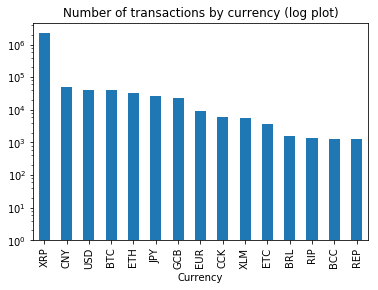

In [57]:
#We probably aren't interested in the less used currrencies, so take the top 10 currencies \
# (XRP,CNY,USD,BTC,ETH,JPY,GCB,EUR,CCK,XLM)
# * XRP is the native currency of Ripple
# * CNY is Chinese Yuan
# * USD is US dollars
# * BTC is Bitcoin
# * ETH is Etherium
# * JPY is Japanese Yen
# * GCB appears to be a scam currency https://www.xrpchat.com/topic/2392-gcb-scam-detail/
# * EUR I shouldn't need to explain
# * CCK is also probably some scam currency as there are no references to it anywhere else
# * XLM is Stellar Lumens (another cryptocurrency)
plt.figure()
plt.title('Number of transactions by currency (log plot)')
grouped_c_agg.nlargest(15).plot.bar(log=True) #For the detail

valid_proportion = (sum(grouped_c_agg.nlargest(12))-(grouped_c_agg['CCK']+grouped_c_agg['GCB']))/len(dataset)
print("The top ten genuine currencies (excluding CCK and GCB) account for {:.1%} of transactions".format(valid_proportion))


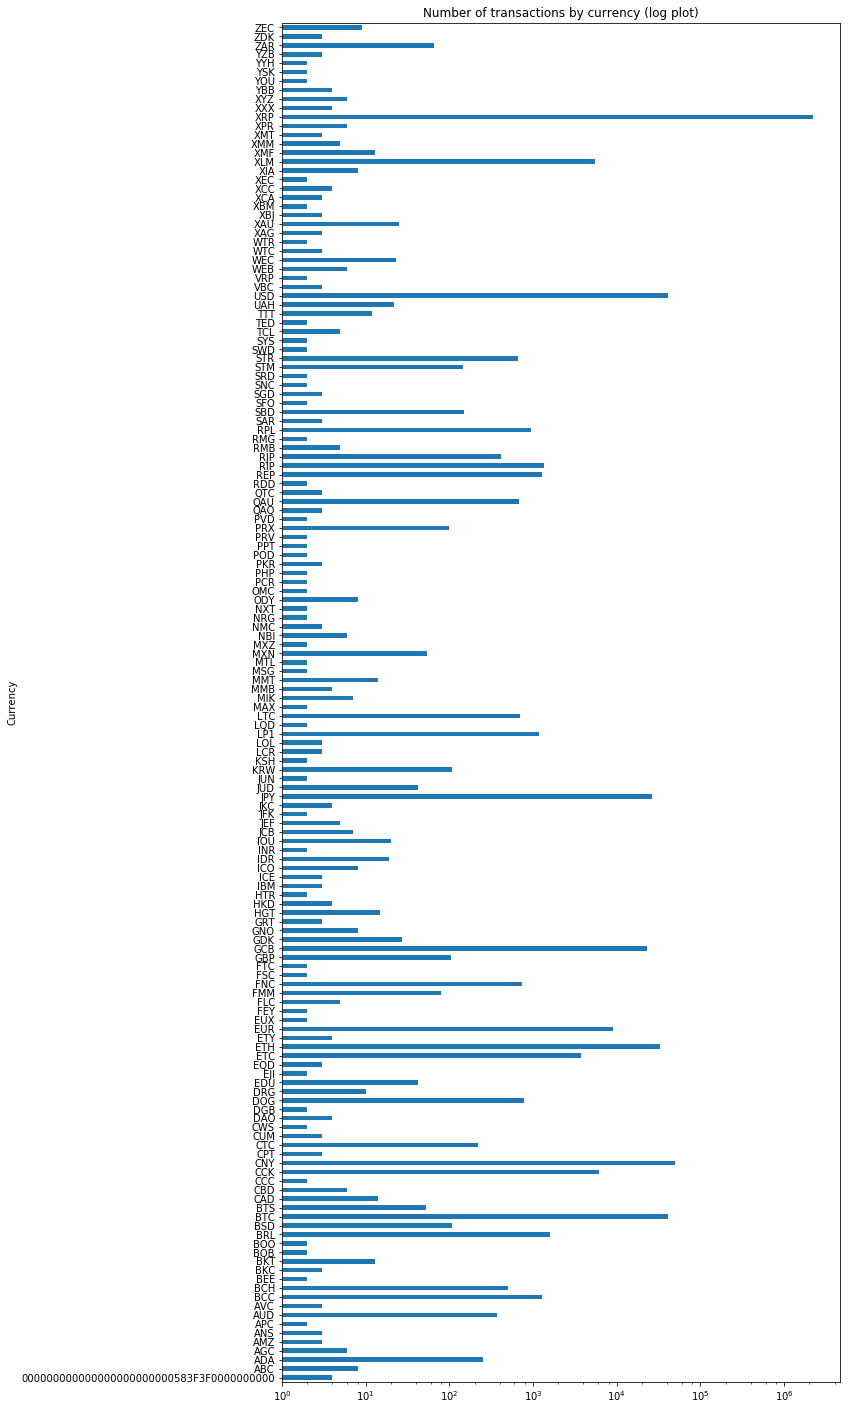

In [78]:
# Just in case you are interested in the full distribution of the different currencies, here they are:
grouped_c_agg = grouped_c.count()
plt.figure(figsize=(10,25))
plt.title('Number of transactions by currency (log plot)')
grouped_c_agg['Amount'].plot.barh(log=True)

# Distribution of XRP transaction size

Number of XRP transactions: 2233987


count     2233987.0
unique     382097.0
top             1.0
freq       374966.0
Name: Amount, dtype: float64

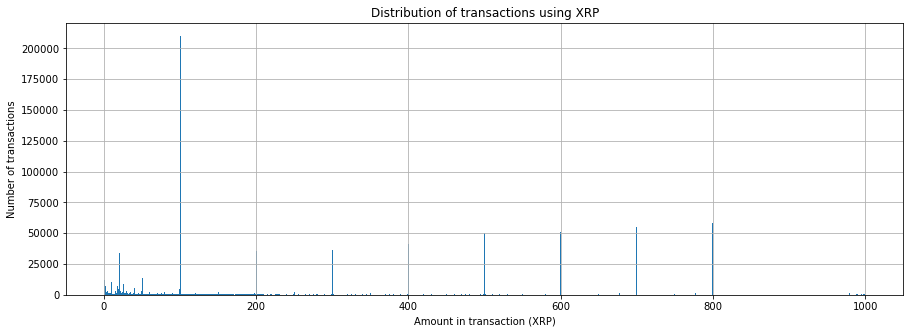

In [93]:
dict_c = {}
for currency,df in grouped_c:
    dict_c[currency] = df

XRP_df = dict_c['XRP']
#At the time, £1 = 6XRP [https://www.mataf.net/en/currency/converter-GBP-XRP?m1=1]

XRP_df.loc[:,'Amount_in_XRP'] = XRP_df.loc[:,'Amount'].astype('float')*1e-6
plt.figure(figsize=(15,5))
plt.ylabel('Number of transactions')
plt.xlabel('Amount in transaction (XRP)')
plt.title('Distribution of transactions using XRP')
XRP_df['Amount_in_XRP'].hist(range=[1,1e3],bins=1000)
print("Number of XRP transactions: {}".format(len(XRP_df['Amount'])))
XRP_df['Amount'].describe()

Number of CNY transactions: 49779


count     49779.0
unique    19482.0
top       10000.0
freq       2353.0
Name: Amount, dtype: float64

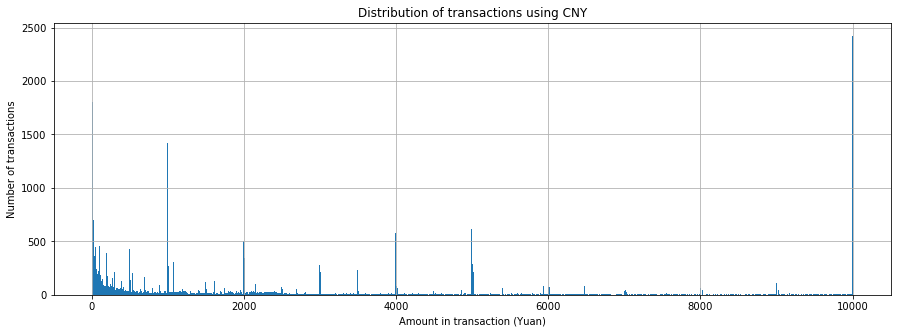

In [89]:

CNY_df = dict_c['CNY']

plt.figure(figsize=(15,5))
plt.ylabel('Number of transactions')
plt.xlabel('Amount in transaction (Yuan)')
plt.title('Distribution of transactions using CNY')
CNY_df['Amount'].astype('float').hist(range=[1,1e4],bins=1000)
print("Number of CNY transactions: {}".format(len(CNY_df['Amount'])))
CNY_df['Amount'].describe()

> There are lots of transactions involving 10000 Yuan